In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import matplotlib.font_manager as fm
from tempfile import NamedTemporaryFile

from matplotlib import rcParams
from matplotlib.ticker import FuncFormatter

In [2]:
pt_serif = 'https://github.com/google/fonts/raw/a4f3deeca2d7547351ff746f7bf3b51f5528dbcf/ofl/ptserif/PT_Serif-Web-Regular.ttf'
google_font_response = requests.get(pt_serif)

font_name = None
font_prop = None
with NamedTemporaryFile(delete=False, suffix='.ttf') as f:
  font_name = f.name
  f.write(google_font_response.content)

  fm.fontManager.addfont(font_name)
  font_prop = fm.FontProperties(fname=font_name)
  sns.set(font=font_prop.get_name())

/tmp/ipykernel_20323/2923414947.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, header=None, delimiter=r", | ", names=headers)


     Experiment             Label  Value
0  Experiment A        Piece Diff   0.37
1  Experiment B        Piece Diff   2.69
2  Experiment A  Middle Line Diff   0.86
3  Experiment B  Middle Line Diff   0.53
4  Experiment A       Impt Pieces   0.21


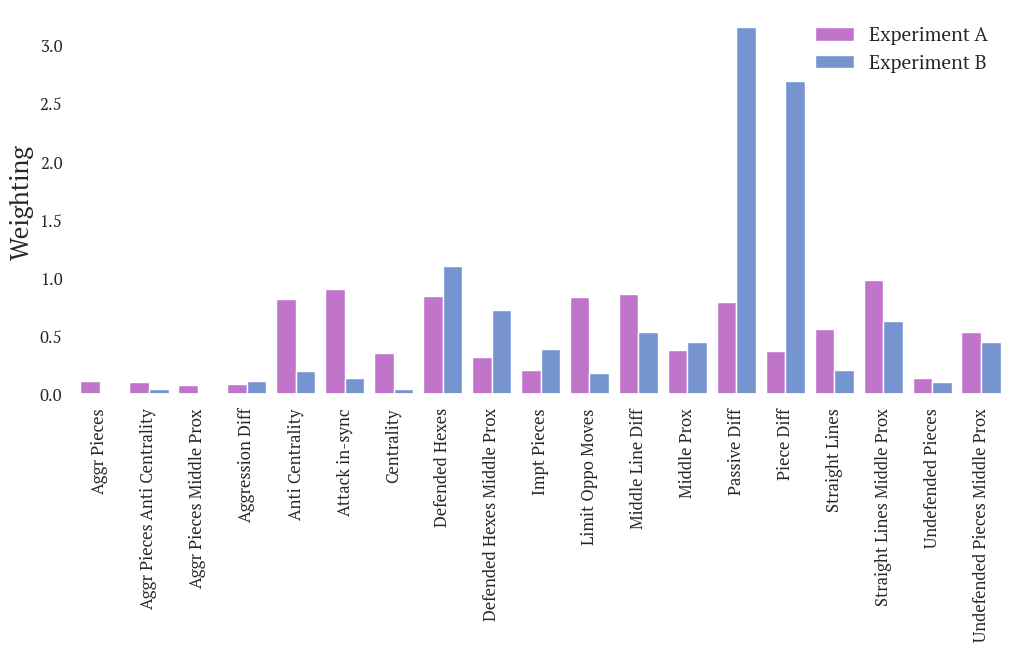

In [104]:
def create_heuristic_visualization(file_path):
  heuristics = ['Piece Diff', 'Middle Line Diff', 'Impt Pieces', 'Middle Prox', 'Aggression Diff', 'Passive Diff', 'Centrality', 'Anti Centrality', 'Defended Hexes', 'Defended Hexes Middle Prox', 'Undefended Pieces', 'Undefended Pieces Middle Prox', 'Attack in-sync', 'Limit Oppo Moves', 'Straight Lines', 'Straight Lines Middle Prox', 'Aggr Pieces', 'Aggr Pieces Middle Prox', 'Aggr Pieces Anti Centrality']
  headers = ['Experiment'] + heuristics
  df = pd.read_csv(file_path, header=None, delimiter=r", | ", names=headers)
  df['Experiment'] = "Experiment " + df['Experiment']
  # df = pd.pivot_table(df, index='Experiment', values=heuristics)
  df_melted = df.melt(id_vars='Experiment', var_name='Label', value_name='Value')
  print(df_melted.head())

  colors = [
    "#cb67d8", 
    # "#e3e3e3", 
    "#6790df"
  ]
  color_scheme = sns.color_palette(colors)

  g = sns.barplot(
    df_melted, 
    # kind="bar",
    x="Label",
    y="Value",
    hue="Experiment",
    errorbar=None,
    palette=color_scheme,
    order=sorted(heuristics)
    # legend=False,
  )
  
  sns.set(rc={"figure.figsize":(12, 5)}, font_scale=1.1)
  sns.set_style(rc={"font.sans-serif":font_prop.get_name(), "axes.facecolor":"white"})
  sns.set_context(rc={"axes.labelsize": 18})
  g.set(xlabel=None, ylabel='Weighting')
  plt.tick_params(axis='x', bottom=False, top=False, labelbottom=True, labelrotation=90)

  # plt.xticks(rotation=45, horizontalalignment='right')
  legend = plt.legend(loc="best", facecolor='white', frameon=False, fontsize=14, markerscale=5)

create_heuristic_visualization("comparison_file.csv")